In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from imblearn.metrics import specificity_score

In [3]:
data = pd.read_csv("dataset/spambase.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [5]:
#data['class'] = data['class'].replace([-1], 0)

<AxesSubplot:xlabel='spam', ylabel='count'>

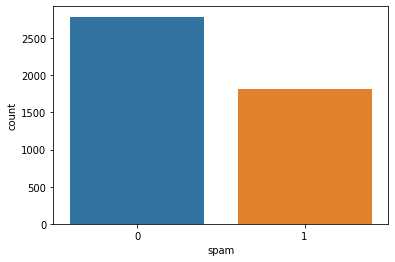

In [6]:
sns.countplot(x=data['spam'])

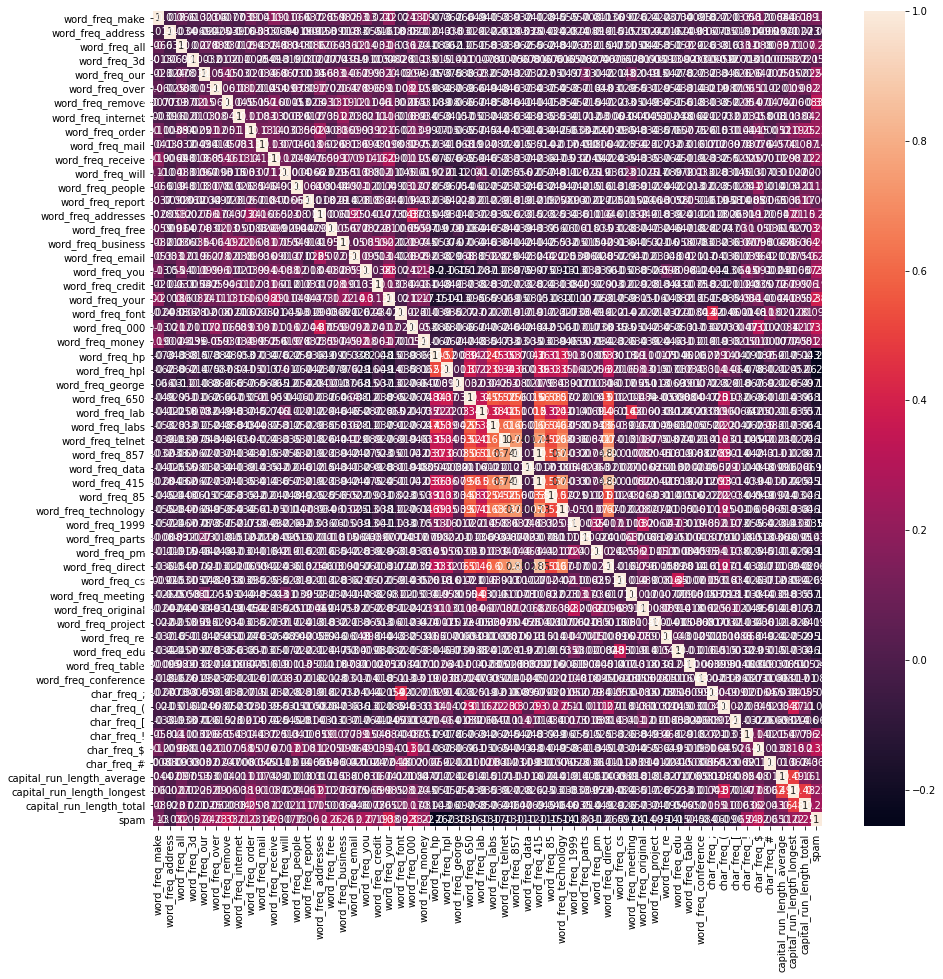

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [8]:
X = data.drop(["spam"],axis =1)
y = data["spam"]

# 90:10

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4140, 57), (4140,), (461, 57), (461,))

In [10]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
prc = []
auroc = []
mcc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    prc.append(round(e, 3))
    auroc.append(round(f, 3))
    mcc.append(round(g, 3))

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, confusion_matrix

# Random Forest

In [12]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)
rf_prc = average_precision_score(y_pred, y_test)
rf_auroc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
rf_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('Random Forest Classifier - 90:10',rf_acc,rf_prec,rf_rec,rf_f1,rf_prc,rf_auroc,rf_mcc)

# SVM

In [13]:
from sklearn.svm import SVC
# instantiate the model
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test)
svm_rec = recall_score(y_pred, y_test)
svm_f1 = f1_score(y_pred, y_test)
svm_prc = average_precision_score(y_pred, y_test)
svm_auroc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('Support Vector Classifier - 90:10',svm_acc,svm_prec,svm_rec,svm_f1,svm_prc,svm_auroc,svm_mcc)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
lr = LogisticRegression(random_state=0)

# fit the model 
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test)
lr_rec = recall_score(y_pred, y_test)
lr_f1 = f1_score(y_pred, y_test)
lr_prc = average_precision_score(y_pred, y_test)
lr_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('Logistic Regression - 90:10',lr_acc,lr_prec,lr_rec,lr_f1,lr_prc,lr_auroc,lr_mcc)

# MLP

In [15]:
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test)
mlp_rec = recall_score(y_pred, y_test)
mlp_f1 = f1_score(y_pred, y_test)
mlp_prc = average_precision_score(y_pred, y_test)
mlp_auroc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
mlp_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('MLP Classifier - 90:10',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_prc,mlp_auroc,mlp_mcc)

# C4.5

In [16]:
from c45 import C45
clf = C45()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

c45_acc = accuracy_score(y_pred, y_test)
c45_prec = precision_score(y_pred, y_test)
c45_rec = recall_score(y_pred, y_test)
c45_f1 = f1_score(y_pred, y_test)
c45_prc = average_precision_score(y_pred, y_test)
c45_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
c45_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('C4.5 - 90:10',c45_acc,c45_prec,c45_rec,c45_f1,c45_prc,c45_auroc,c45_mcc)

# Bayesian Network using NB

In [17]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bn_acc = accuracy_score(y_pred, y_test)
bn_prec = precision_score(y_pred, y_test)
bn_rec = recall_score(y_pred, y_test)
bn_f1 = f1_score(y_pred, y_test)
bn_prc = average_precision_score(y_pred, y_test)
bn_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
bn_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('Bayesian Network - 90:10',bn_acc,bn_prec,bn_rec,bn_f1,bn_prc,bn_auroc,bn_mcc)

# REP Tree - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# fit the model 
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_prc = average_precision_score(y_pred, y_test)
dt_auroc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('REP Tree Classifier - 90:10',dt_acc,dt_prec,dt_rec,dt_f1,dt_prc,dt_auroc,dt_mcc)

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
nb = GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test)
nb_rec = recall_score(y_pred, y_test)
nb_f1 = f1_score(y_pred, y_test)
nb_prc = average_precision_score(y_pred, y_test)
nb_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
nb_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('Naive Bayes - 90:10',nb_acc,nb_prec,nb_rec,nb_f1,nb_prc,nb_auroc,nb_mcc)

# P A R T - Passive Aggresive Random Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

model = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('PA', model), ('RF', clf2), ('DT', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

part_acc = accuracy_score(y_pred, y_test)
part_prec = precision_score(y_pred, y_test)
part_rec = recall_score(y_pred, y_test)
part_f1 = f1_score(y_pred, y_test)
part_prc = average_precision_score(y_pred, y_test)
part_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
part_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('P A R T - 90:10',part_acc,part_prec,part_rec,part_f1,part_prc,part_auroc,part_mcc)

# ABET

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = AdaBoostClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf2 = VotingClassifier(estimators=[('AB', clf2), ('ET', clf3)], voting='soft')

eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

abet_acc = accuracy_score(y_pred, y_test)
abet_prec = precision_score(y_pred, y_test)
abet_rec = recall_score(y_pred, y_test)
abet_f1 = f1_score(y_pred, y_test)
abet_prc = average_precision_score(y_pred, y_test)
abet_auroc = roc_auc_score(y_test, eclf2.predict_proba(X_test)[:, 1])
abet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('ABET - 90:10',abet_acc,abet_prec,abet_rec,abet_f1,abet_prc,abet_auroc,abet_mcc)

# ROFET

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = RandomForestClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf3 = VotingClassifier(estimators=[('RF', clf2), ('ET', clf3)], voting='soft')

eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

rofet_acc = accuracy_score(y_pred, y_test)
rofet_prec = precision_score(y_pred, y_test)
rofet_rec = recall_score(y_pred, y_test)
rofet_f1 = f1_score(y_pred, y_test)
rofet_prc = average_precision_score(y_pred, y_test)
rofet_auroc = roc_auc_score(y_test, eclf3.predict_proba(X_test)[:, 1])
rofet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('ROFET - 90:10',rofet_acc,rofet_prec,rofet_rec,rofet_f1,rofet_prc,rofet_auroc,rofet_mcc)

# BET

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

bag = BaggingClassifier(ExtraTreesClassifier(n_estimators=100, random_state=0),n_estimators=10, random_state=0)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bet_acc = accuracy_score(y_pred, y_test)
bet_prec = precision_score(y_pred, y_test)
bet_rec = recall_score(y_pred, y_test)
bet_f1 = f1_score(y_pred, y_test)
bet_prc = average_precision_score(y_pred, y_test)
bet_auroc = roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1])
bet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('BET - 90:10',bet_acc,bet_prec,bet_rec,bet_f1,bet_prc,bet_auroc,bet_mcc)

# LBET

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

clf1 = LogisticRegression(random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf4 = VotingClassifier(estimators=[('LR', clf1),('Boos', clf2), ('ET', clf3)], voting='soft')

eclf4.fit(X_train, y_train)
y_pred = eclf4.predict(X_test)

lbet_acc = accuracy_score(y_pred, y_test)
lbet_prec = precision_score(y_pred, y_test)
lbet_rec = recall_score(y_pred, y_test)
lbet_f1 = f1_score(y_pred, y_test)
lbet_prc = average_precision_score(y_pred, y_test)
lbet_auroc = roc_auc_score(y_test, eclf4.predict_proba(X_test)[:, 1])
lbet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults('LBET - 90:10',lbet_acc,lbet_prec,lbet_rec,lbet_f1,lbet_prc,lbet_auroc,lbet_mcc)

# Comparison

In [25]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'F1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'TPR': prc,
                        'FPR' : prc,
                       'ROC' : auroc,
                       'MCC' : mcc
                      })

In [26]:
result

,ML Model,Accuracy,F1_score,Recall,Precision,TPR,FPR,ROC,MCC
0,Random Forest Classifier - 90:10,0.948,0.937,0.962,0.912,0.893,0.893,0.986,0.893
1,Support Vector Classifier - 90:10,0.714,0.571,0.772,0.454,0.407,0.407,0.802,0.408
2,Logistic Regression - 90:10,0.915,0.898,0.914,0.881,0.841,0.841,0.959,0.826
3,MLP Classifier - 90:10,0.944,0.934,0.920,0.948,0.907,0.907,0.976,0.885
4,C4.5 - 90:10,0.907,0.886,0.913,0.861,0.820,0.820,0.959,0.808
5,Bayesian Network - 90:10,0.889,0.858,0.933,0.794,0.765,0.765,0.964,0.775
6,REP Tree Classifier - 90:10,0.922,0.906,0.920,0.892,0.853,0.853,0.918,0.839
7,Naive Bayes - 90:10,0.839,0.834,0.738,0.959,0.851,0.851,0.941,0.706
8,P A R T - 90:10,0.946,0.936,0.933,0.938,0.904,0.904,0.941,0.889
9,ABET - 90:10,0.961,0.953,0.973,0.933,0.919,0.919,0.992,0.920


# 80 : 20

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3680, 57), (3680,), (921, 57), (921,))

In [28]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
prc1 = []
auroc1 = []
mcc1 = []

def storeResults1(model, a,b,c,d,e,f,g):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    prc1.append(round(e, 3))
    auroc1.append(round(f, 3))
    mcc1.append(round(g, 3))

# Random Forest

In [29]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)
rf_prc = average_precision_score(y_pred, y_test)
rf_auroc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
rf_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('Random Forest Classifier - 80:20',rf_acc,rf_prec,rf_rec,rf_f1,rf_prc,rf_auroc,rf_mcc)

# SVM

In [30]:
from sklearn.svm import SVC
# instantiate the model
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test)
svm_rec = recall_score(y_pred, y_test)
svm_f1 = f1_score(y_pred, y_test)
svm_prc = average_precision_score(y_pred, y_test)
svm_auroc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('Support Vector Classifier - 80:20',svm_acc,svm_prec,svm_rec,svm_f1,svm_prc,svm_auroc,svm_mcc)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
lr = LogisticRegression(random_state=0)

# fit the model 
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test)
lr_rec = recall_score(y_pred, y_test)
lr_f1 = f1_score(y_pred, y_test)
lr_prc = average_precision_score(y_pred, y_test)
lr_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('Logistic Regression - 80:20',lr_acc,lr_prec,lr_rec,lr_f1,lr_prc,lr_auroc,lr_mcc)

# MLP

In [32]:
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test)
mlp_rec = recall_score(y_pred, y_test)
mlp_f1 = f1_score(y_pred, y_test)
mlp_prc = average_precision_score(y_pred, y_test)
mlp_auroc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
mlp_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('MLP Classifier - 80:20',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_prc,mlp_auroc,mlp_mcc)

# C4.5

In [33]:
from c45 import C45
clf = C45()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

c45_acc = accuracy_score(y_pred, y_test)
c45_prec = precision_score(y_pred, y_test)
c45_rec = recall_score(y_pred, y_test)
c45_f1 = f1_score(y_pred, y_test)
c45_prc = average_precision_score(y_pred, y_test)
c45_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
c45_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('C4.5 - 80:20',c45_acc,c45_prec,c45_rec,c45_f1,c45_prc,c45_auroc,c45_mcc)

# Bayesian Network

In [34]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bn_acc = accuracy_score(y_pred, y_test)
bn_prec = precision_score(y_pred, y_test)
bn_rec = recall_score(y_pred, y_test)
bn_f1 = f1_score(y_pred, y_test)
bn_prc = average_precision_score(y_pred, y_test)
bn_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
bn_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('Bayesian Network - 80:20',bn_acc,bn_prec,bn_rec,bn_f1,bn_prc,bn_auroc,bn_mcc)

# REP Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# fit the model 
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_prc = average_precision_score(y_pred, y_test)
dt_auroc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('REP Tree Classifier - 80:20',dt_acc,dt_prec,dt_rec,dt_f1,dt_prc,dt_auroc,dt_mcc)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
nb = GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test)
nb_rec = recall_score(y_pred, y_test)
nb_f1 = f1_score(y_pred, y_test)
nb_prc = average_precision_score(y_pred, y_test)
nb_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
nb_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('Naive Bayes - 80:20',nb_acc,nb_prec,nb_rec,nb_f1,nb_prc,nb_auroc,nb_mcc)

# P A R T

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

model = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('PA', model), ('RF', clf2), ('DT', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

part_acc = accuracy_score(y_pred, y_test)
part_prec = precision_score(y_pred, y_test)
part_rec = recall_score(y_pred, y_test)
part_f1 = f1_score(y_pred, y_test)
part_prc = average_precision_score(y_pred, y_test)
part_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
part_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('P A R T - 80:20',part_acc,part_prec,part_rec,part_f1,part_prc,part_auroc,part_mcc)

# ABET

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = AdaBoostClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf2 = VotingClassifier(estimators=[('AB', clf2), ('ET', clf3)], voting='soft')

eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

abet_acc = accuracy_score(y_pred, y_test)
abet_prec = precision_score(y_pred, y_test)
abet_rec = recall_score(y_pred, y_test)
abet_f1 = f1_score(y_pred, y_test)
abet_prc = average_precision_score(y_pred, y_test)
abet_auroc = roc_auc_score(y_test, eclf2.predict_proba(X_test)[:, 1])
abet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('ABET - 80:20',abet_acc,abet_prec,abet_rec,abet_f1,abet_prc,abet_auroc,abet_mcc)

# ROFET

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = RandomForestClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf3 = VotingClassifier(estimators=[('RF', clf2), ('ET', clf3)], voting='soft')

eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

rofet_acc = accuracy_score(y_pred, y_test)
rofet_prec = precision_score(y_pred, y_test)
rofet_rec = recall_score(y_pred, y_test)
rofet_f1 = f1_score(y_pred, y_test)
rofet_prc = average_precision_score(y_pred, y_test)
rofet_auroc = roc_auc_score(y_test, eclf3.predict_proba(X_test)[:, 1])
rofet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('ROFET - 80:20',rofet_acc,rofet_prec,rofet_rec,rofet_f1,rofet_prc,rofet_auroc,rofet_mcc)

# BET

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

bag = BaggingClassifier(ExtraTreesClassifier(n_estimators=100, random_state=0),n_estimators=10, random_state=0)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bet_acc = accuracy_score(y_pred, y_test)
bet_prec = precision_score(y_pred, y_test)
bet_rec = recall_score(y_pred, y_test)
bet_f1 = f1_score(y_pred, y_test)
bet_prc = average_precision_score(y_pred, y_test)
bet_auroc = roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1])
bet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('BET - 80:20',bet_acc,bet_prec,bet_rec,bet_f1,bet_prc,bet_auroc,bet_mcc)

# LBET

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

clf1 = LogisticRegression(random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf4 = VotingClassifier(estimators=[('LR', clf1),('Boos', clf2), ('ET', clf3)], voting='soft')

eclf4.fit(X_train, y_train)
y_pred = eclf4.predict(X_test)

lbet_acc = accuracy_score(y_pred, y_test)
lbet_prec = precision_score(y_pred, y_test)
lbet_rec = recall_score(y_pred, y_test)
lbet_f1 = f1_score(y_pred, y_test)
lbet_prc = average_precision_score(y_pred, y_test)
lbet_auroc = roc_auc_score(y_test, eclf4.predict_proba(X_test)[:, 1])
lbet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults1('LBET - 80:20',lbet_acc,lbet_prec,lbet_rec,lbet_f1,lbet_prc,lbet_auroc,lbet_mcc)

# Comparison

In [42]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'F1_score' : f1score1,
                        'Recall'   : recall1,
                        'Precision': precision1,
                        'TPR': prc1,
                        'FPR' : prc1,
                       'ROC' : auroc1,
                       'MCC' : mcc1
                      })

result

,ML Model,Accuracy,F1_score,Recall,Precision,TPR,FPR,ROC,MCC
0,Random Forest Classifier - 80:20,0.954,0.938,0.947,0.930,0.900,0.900,0.986,0.902
1,Support Vector Classifier - 80:20,0.717,0.519,0.705,0.411,0.354,0.354,0.804,0.362
2,Logistic Regression - 80:20,0.924,0.896,0.915,0.878,0.833,0.833,0.966,0.836
3,MLP Classifier - 80:20,0.888,0.861,0.802,0.930,0.831,0.831,0.953,0.774
4,C4.5 - 80:20,0.931,0.907,0.907,0.907,0.857,0.857,0.966,0.851
5,Bayesian Network - 80:20,0.898,0.858,0.893,0.825,0.773,0.773,0.955,0.780
6,REP Tree Classifier - 80:20,0.919,0.895,0.862,0.930,0.857,0.857,0.921,0.830
7,Naive Bayes - 80:20,0.807,0.783,0.672,0.939,0.802,0.802,0.939,0.646
8,P A R T - 80:20,0.945,0.928,0.903,0.953,0.899,0.899,0.939,0.884
9,ABET - 80:20,0.969,0.957,0.967,0.948,0.928,0.928,0.991,0.932


# 70:30

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3220, 57), (3220,), (1381, 57), (1381,))

In [44]:
ML_Model2 = []
accuracy2 = []
precision2 = []
recall2 = []
f1score2 = []
prc2 = []
auroc2 = []
mcc2 = []

def storeResults2(model, a,b,c,d,e,f,g):
    ML_Model2.append(model)
    accuracy2.append(round(a, 3))
    precision2.append(round(b, 3))
    recall2.append(round(c, 3))
    f1score2.append(round(d, 3))
    prc2.append(round(e, 3))
    auroc2.append(round(f, 3))
    mcc2.append(round(g, 3))

# Random Forest

In [45]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)
rf_prc = average_precision_score(y_pred, y_test)
rf_auroc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
rf_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('Random Forest Classifier - 70:30',rf_acc,rf_prec,rf_rec,rf_f1,rf_prc,rf_auroc,rf_mcc)

# SVM

In [46]:
from sklearn.svm import SVC
# instantiate the model
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test)
svm_rec = recall_score(y_pred, y_test)
svm_f1 = f1_score(y_pred, y_test)
svm_prc = average_precision_score(y_pred, y_test)
svm_auroc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('Support Vector Classifier - 70:30',svm_acc,svm_prec,svm_rec,svm_f1,svm_prc,svm_auroc,svm_mcc)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
lr = LogisticRegression(random_state=0)

# fit the model 
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test)
lr_rec = recall_score(y_pred, y_test)
lr_f1 = f1_score(y_pred, y_test)
lr_prc = average_precision_score(y_pred, y_test)
lr_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('Logistic Regression - 70:30',lr_acc,lr_prec,lr_rec,lr_f1,lr_prc,lr_auroc,lr_mcc)

# MLP

In [48]:
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test)
mlp_rec = recall_score(y_pred, y_test)
mlp_f1 = f1_score(y_pred, y_test)
mlp_prc = average_precision_score(y_pred, y_test)
mlp_auroc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
mlp_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('MLP Classifier - 70:30',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_prc,mlp_auroc,mlp_mcc)

# C4.5

In [49]:
from c45 import C45
clf = C45()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

c45_acc = accuracy_score(y_pred, y_test)
c45_prec = precision_score(y_pred, y_test)
c45_rec = recall_score(y_pred, y_test)
c45_f1 = f1_score(y_pred, y_test)
c45_prc = average_precision_score(y_pred, y_test)
c45_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
c45_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('C4.5 - 70:30',c45_acc,c45_prec,c45_rec,c45_f1,c45_prc,c45_auroc,c45_mcc)

# Bayesian Network

In [50]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bn_acc = accuracy_score(y_pred, y_test)
bn_prec = precision_score(y_pred, y_test)
bn_rec = recall_score(y_pred, y_test)
bn_f1 = f1_score(y_pred, y_test)
bn_prc = average_precision_score(y_pred, y_test)
bn_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
bn_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('Bayesian Network - 70:30',bn_acc,bn_prec,bn_rec,bn_f1,bn_prc,bn_auroc,bn_mcc)

# REP Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# fit the model 
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_prc = average_precision_score(y_pred, y_test)
dt_auroc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('REP Tree Classifier - 70:30',dt_acc,dt_prec,dt_rec,dt_f1,dt_prc,dt_auroc,dt_mcc)

# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
nb = GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test)
nb_rec = recall_score(y_pred, y_test)
nb_f1 = f1_score(y_pred, y_test)
nb_prc = average_precision_score(y_pred, y_test)
nb_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
nb_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('Naive Bayes - 70:30',nb_acc,nb_prec,nb_rec,nb_f1,nb_prc,nb_auroc,nb_mcc)

# PART

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

model = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('PA', model), ('RF', clf2), ('DT', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

part_acc = accuracy_score(y_pred, y_test)
part_prec = precision_score(y_pred, y_test)
part_rec = recall_score(y_pred, y_test)
part_f1 = f1_score(y_pred, y_test)
part_prc = average_precision_score(y_pred, y_test)
part_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
part_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('P A R T - 70:30',part_acc,part_prec,part_rec,part_f1,part_prc,part_auroc,part_mcc)

# ABET

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = AdaBoostClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf2 = VotingClassifier(estimators=[('AB', clf2), ('ET', clf3)], voting='soft')

eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

abet_acc = accuracy_score(y_pred, y_test)
abet_prec = precision_score(y_pred, y_test)
abet_rec = recall_score(y_pred, y_test)
abet_f1 = f1_score(y_pred, y_test)
abet_prc = average_precision_score(y_pred, y_test)
abet_auroc = roc_auc_score(y_test, eclf2.predict_proba(X_test)[:, 1])
abet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('ABET - 70:30',abet_acc,abet_prec,abet_rec,abet_f1,abet_prc,abet_auroc,abet_mcc)

# ROFET

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = RandomForestClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf3 = VotingClassifier(estimators=[('RF', clf2), ('ET', clf3)], voting='soft')

eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

rofet_acc = accuracy_score(y_pred, y_test)
rofet_prec = precision_score(y_pred, y_test)
rofet_rec = recall_score(y_pred, y_test)
rofet_f1 = f1_score(y_pred, y_test)
rofet_prc = average_precision_score(y_pred, y_test)
rofet_auroc = roc_auc_score(y_test, eclf3.predict_proba(X_test)[:, 1])
rofet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('ROFET - 70:30',rofet_acc,rofet_prec,rofet_rec,rofet_f1,rofet_prc,rofet_auroc,rofet_mcc)

# BET

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

bag = BaggingClassifier(ExtraTreesClassifier(n_estimators=100, random_state=0),n_estimators=10, random_state=0)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bet_acc = accuracy_score(y_pred, y_test)
bet_prec = precision_score(y_pred, y_test)
bet_rec = recall_score(y_pred, y_test)
bet_f1 = f1_score(y_pred, y_test)
bet_prc = average_precision_score(y_pred, y_test)
bet_auroc = roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1])
bet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('BET-70:30',bet_acc,bet_prec,bet_rec,bet_f1,bet_prc,bet_auroc,bet_mcc)

# LBET

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

clf1 = LogisticRegression(random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf4 = VotingClassifier(estimators=[('LR', clf1),('Boos', clf2), ('ET', clf3)], voting='soft')

eclf4.fit(X_train, y_train)
y_pred = eclf4.predict(X_test)

lbet_acc = accuracy_score(y_pred, y_test)
lbet_prec = precision_score(y_pred, y_test)
lbet_rec = recall_score(y_pred, y_test)
lbet_f1 = f1_score(y_pred, y_test)
lbet_prc = average_precision_score(y_pred, y_test)
lbet_auroc = roc_auc_score(y_test, eclf4.predict_proba(X_test)[:, 1])
lbet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults2('LBET - 70:30',lbet_acc,lbet_prec,lbet_rec,lbet_f1,lbet_prc,lbet_auroc,lbet_mcc)

# Comparison

In [58]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model2,
                        'Accuracy' : accuracy2,
                        'F1_score' : f1score2,
                        'Recall'   : recall2,
                        'Precision': precision2,
                        'TPR': prc2,
                        'FPR' : prc2,
                       'ROC' : auroc2,
                       'MCC' : mcc2
                      })

result

,ML Model,Accuracy,F1_score,Recall,Precision,TPR,FPR,ROC,MCC
0,Random Forest Classifier - 70:30,0.938,0.921,0.952,0.892,0.867,0.867,0.981,0.872
1,Support Vector Classifier - 70:30,0.698,0.548,0.684,0.458,0.398,0.398,0.802,0.350
2,Logistic Regression - 70:30,0.918,0.896,0.912,0.881,0.837,0.837,0.970,0.829
3,MLP Classifier - 70:30,0.930,0.909,0.940,0.881,0.850,0.850,0.981,0.853
4,C4.5 - 70:30,0.911,0.887,0.898,0.877,0.828,0.828,0.970,0.814
5,Bayesian Network - 70:30,0.879,0.842,0.883,0.805,0.753,0.753,0.954,0.747
6,REP Tree Classifier - 70:30,0.909,0.885,0.893,0.877,0.825,0.825,0.903,0.810
7,Naive Bayes - 70:30,0.832,0.822,0.715,0.966,0.845,0.845,0.943,0.697
8,P A R T - 70:30,0.944,0.930,0.941,0.919,0.887,0.887,0.943,0.884
9,ABET - 70:30,0.957,0.944,0.970,0.920,0.904,0.904,0.990,0.910


# 60:40

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2760, 57), (2760,), (1841, 57), (1841,))

In [60]:
ML_Model3 = []
accuracy3 = []
precision3 = []
recall3 = []
f1score3 = []
prc3 = []
auroc3 = []
mcc3 = []


#function to call for storing the results
def storeResults3(model, a,b,c,d,e,f,g):
    ML_Model3.append(model)
    accuracy3.append(round(a, 3))
    precision3.append(round(b, 3))
    recall3.append(round(c, 3))
    f1score3.append(round(d, 3))
    prc3.append(round(e, 3))
    auroc3.append(round(f, 3))
    mcc3.append(round(g, 3))

# RAndom FOrest

In [61]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)
rf_prc = average_precision_score(y_pred, y_test)
rf_auroc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
rf_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('Random Forest Classifier - 60:40',rf_acc,rf_prec,rf_rec,rf_f1,rf_prc,rf_auroc,rf_mcc)

# SVM

In [62]:
from sklearn.svm import SVC
# instantiate the model
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test)
svm_rec = recall_score(y_pred, y_test)
svm_f1 = f1_score(y_pred, y_test)
svm_prc = average_precision_score(y_pred, y_test)
svm_auroc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('Support Vector Classifier - 60:40',svm_acc,svm_prec,svm_rec,svm_f1,svm_prc,svm_auroc,svm_mcc)

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
lr = LogisticRegression(random_state=0)

# fit the model 
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test)
lr_rec = recall_score(y_pred, y_test)
lr_f1 = f1_score(y_pred, y_test)
lr_prc = average_precision_score(y_pred, y_test)
lr_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('Logistic Regression - 60:40',lr_acc,lr_prec,lr_rec,lr_f1,lr_prc,lr_auroc,lr_mcc)

# MLP

In [64]:
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test)
mlp_rec = recall_score(y_pred, y_test)
mlp_f1 = f1_score(y_pred, y_test)
mlp_prc = average_precision_score(y_pred, y_test)
mlp_auroc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
mlp_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('MLP Classifier - 60:40',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_prc,mlp_auroc,mlp_mcc)

# C4.5

In [65]:
from c45 import C45
clf = C45()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

c45_acc = accuracy_score(y_pred, y_test)
c45_prec = precision_score(y_pred, y_test)
c45_rec = recall_score(y_pred, y_test)
c45_f1 = f1_score(y_pred, y_test)
c45_prc = average_precision_score(y_pred, y_test)
c45_auroc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
c45_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('C4.5 - 60:40',c45_acc,c45_prec,c45_rec,c45_f1,c45_prc,c45_auroc,c45_mcc)

# BAyesian Network

In [66]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bn_acc = accuracy_score(y_pred, y_test)
bn_prec = precision_score(y_pred, y_test)
bn_rec = recall_score(y_pred, y_test)
bn_f1 = f1_score(y_pred, y_test)
bn_prc = average_precision_score(y_pred, y_test)
bn_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
bn_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('Bayesian Network',bn_acc,bn_prec,bn_rec,bn_f1,bn_prc,bn_auroc,bn_mcc)

# REP Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# fit the model 
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_prc = average_precision_score(y_pred, y_test)
dt_auroc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('REPTree Classifier - 60:40',dt_acc,dt_prec,dt_rec,dt_f1,dt_prc,dt_auroc,dt_mcc)

# NAive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
nb = GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test)
nb_rec = recall_score(y_pred, y_test)
nb_f1 = f1_score(y_pred, y_test)
nb_prc = average_precision_score(y_pred, y_test)
nb_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
nb_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('Naive Bayes - 60:40',nb_acc,nb_prec,nb_rec,nb_f1,nb_prc,nb_auroc,nb_mcc)

# PART

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

model = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('PA', model), ('RF', clf2), ('DT', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

part_acc = accuracy_score(y_pred, y_test)
part_prec = precision_score(y_pred, y_test)
part_rec = recall_score(y_pred, y_test)
part_f1 = f1_score(y_pred, y_test)
part_prc = average_precision_score(y_pred, y_test)
part_auroc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
part_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('P A R T - 60:40',part_acc,part_prec,part_rec,part_f1,part_prc,part_auroc,part_mcc)

# ABET

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = AdaBoostClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf2 = VotingClassifier(estimators=[('AB', clf2), ('ET', clf3)], voting='soft')

eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

abet_acc = accuracy_score(y_pred, y_test)
abet_prec = precision_score(y_pred, y_test)
abet_rec = recall_score(y_pred, y_test)
abet_f1 = f1_score(y_pred, y_test)
abet_prc = average_precision_score(y_pred, y_test)
abet_auroc = roc_auc_score(y_test, eclf2.predict_proba(X_test)[:, 1])
abet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('ABET - 60:40',abet_acc,abet_prec,abet_rec,abet_f1,abet_prc,abet_auroc,abet_mcc)

# ROFET

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf2 = RandomForestClassifier(n_estimators=10)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf3 = VotingClassifier(estimators=[('RF', clf2), ('ET', clf3)], voting='soft')

eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

rofet_acc = accuracy_score(y_pred, y_test)
rofet_prec = precision_score(y_pred, y_test)
rofet_rec = recall_score(y_pred, y_test)
rofet_f1 = f1_score(y_pred, y_test)
rofet_prc = average_precision_score(y_pred, y_test)
rofet_auroc = roc_auc_score(y_test, eclf3.predict_proba(X_test)[:, 1])
rofet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('ROFET - 60:40',rofet_acc,rofet_prec,rofet_rec,rofet_f1,rofet_prc,rofet_auroc,rofet_mcc)

# BET

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

bag = BaggingClassifier(ExtraTreesClassifier(n_estimators=100, random_state=0),n_estimators=10, random_state=0)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bet_acc = accuracy_score(y_pred, y_test)
bet_prec = precision_score(y_pred, y_test)
bet_rec = recall_score(y_pred, y_test)
bet_f1 = f1_score(y_pred, y_test)
bet_prc = average_precision_score(y_pred, y_test)
bet_auroc = roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1])
bet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('BET - 60:40',bet_acc,bet_prec,bet_rec,bet_f1,bet_prc,bet_auroc,bet_mcc)

# LBET

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

clf1 = LogisticRegression(random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100)
clf3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
eclf4 = VotingClassifier(estimators=[('LR', clf1),('Boos', clf2), ('ET', clf3)], voting='soft')

eclf4.fit(X_train, y_train)
y_pred = eclf4.predict(X_test)

lbet_acc = accuracy_score(y_pred, y_test)
lbet_prec = precision_score(y_pred, y_test)
lbet_rec = recall_score(y_pred, y_test)
lbet_f1 = f1_score(y_pred, y_test)
lbet_prc = average_precision_score(y_pred, y_test)
lbet_auroc = roc_auc_score(y_test, eclf4.predict_proba(X_test)[:, 1])
lbet_mcc = matthews_corrcoef(y_pred, y_test)


storeResults3('LBET - 60:40',lbet_acc,lbet_prec,lbet_rec,lbet_f1,lbet_prc,lbet_auroc,lbet_mcc)

# Comparison

In [74]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model3,
                        'Accuracy' : accuracy3,
                        'F1_score' : f1score3,
                        'Recall'   : recall3,
                        'Precision': precision3,
                        'TPR': prc3,
                        'FPR' : prc3,
                       'ROC' : auroc3,
                       'MCC' : mcc3
                      })

result

,ML Model,Accuracy,F1_score,Recall,Precision,TPR,FPR,ROC,MCC
0,Random Forest Classifier - 60:40,0.939,0.921,0.956,0.888,0.866,0.866,0.976,0.872
1,Support Vector Classifier - 60:40,0.692,0.531,0.686,0.433,0.377,0.377,0.782,0.337
2,Logistic Regression - 60:40,0.926,0.906,0.921,0.892,0.852,0.852,0.967,0.845
3,MLP Classifier - 60:40,0.919,0.901,0.883,0.919,0.861,0.861,0.969,0.832
4,C4.5 - 60:40,0.902,0.877,0.883,0.872,0.816,0.816,0.967,0.795
5,Bayesian Network,0.876,0.839,0.881,0.800,0.749,0.749,0.951,0.741
6,REPTree Classifier - 60:40,0.888,0.859,0.866,0.853,0.792,0.792,0.882,0.766
7,Naive Bayes - 60:40,0.824,0.815,0.707,0.962,0.841,0.841,0.949,0.683
8,P A R T - 60:40,0.927,0.905,0.950,0.864,0.839,0.839,0.949,0.848
9,ABET - 60:40,0.955,0.943,0.962,0.924,0.904,0.904,0.986,0.906


# Graph

# 90:10

In [75]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

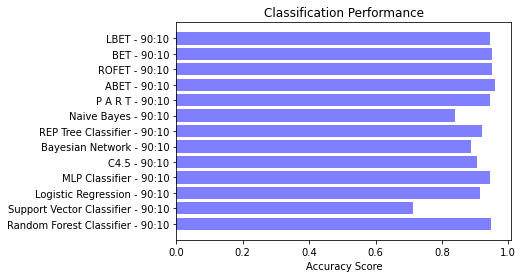

In [76]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

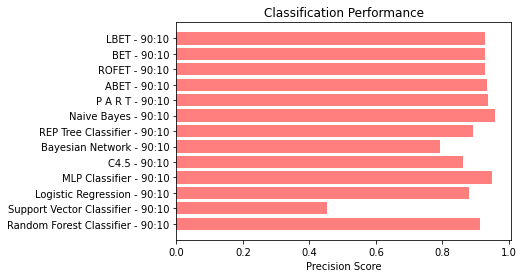

In [77]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

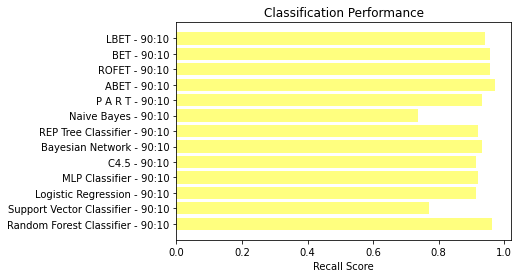

In [78]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

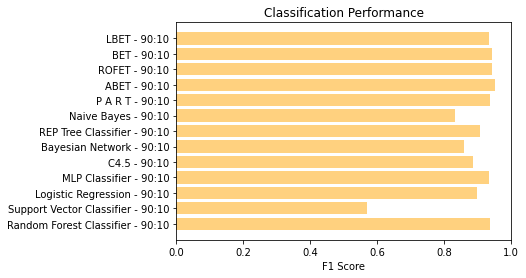

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# TPR & FPR

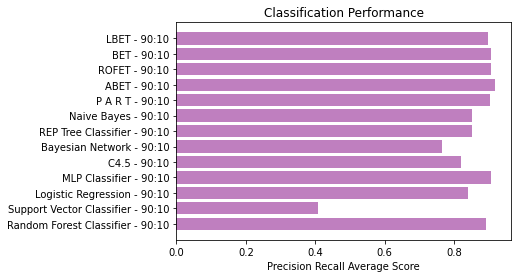

In [81]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prc, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Recall Average Score')
plt2.title('Classification Performance')
plt2.show()

# ROC Score

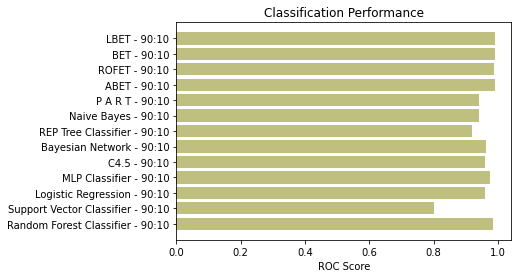

In [82]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auroc, align='center', alpha=0.5,color='olive')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

# MCC 

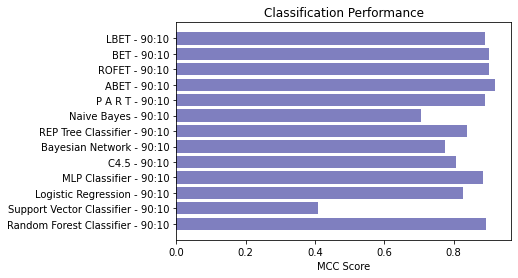

In [83]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

# 80:20

In [84]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

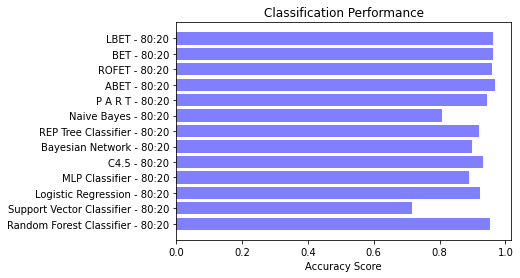

In [85]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

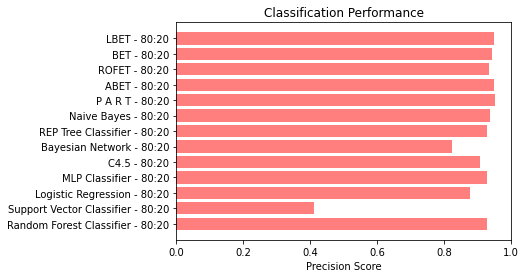

In [86]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

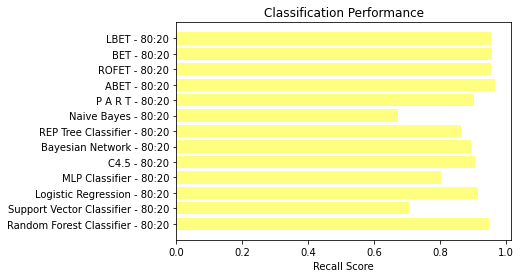

In [87]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1Score

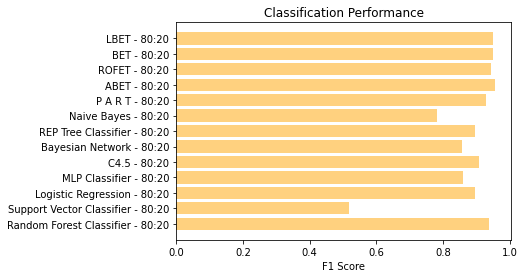

In [88]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# TPR & FPR

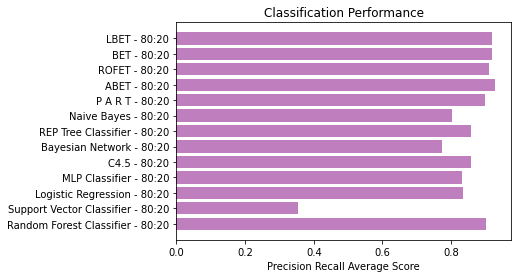

In [89]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prc1, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Recall Average Score')
plt2.title('Classification Performance')
plt2.show()

# ROC Score

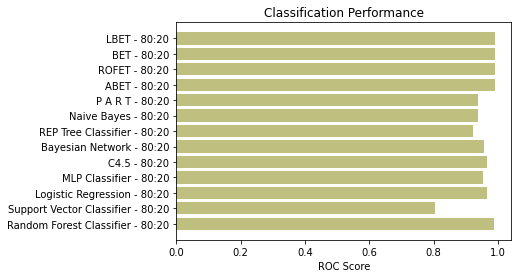

In [90]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auroc1, align='center', alpha=0.5,color='olive')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

# MCC

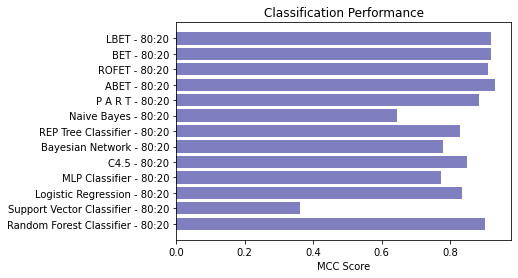

In [91]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mcc1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

# 70:30

In [92]:
classifier = ML_Model2
y_pos = np.arange(len(classifier))

# Accuracy

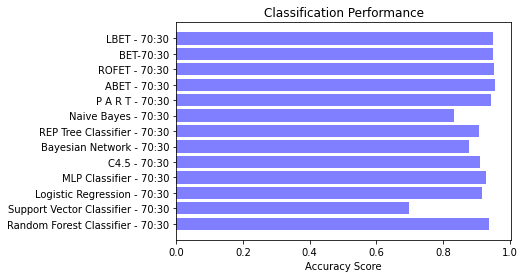

In [93]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

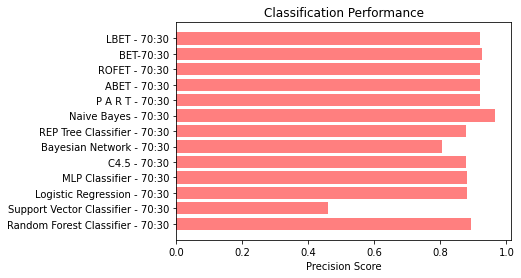

In [94]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision2, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

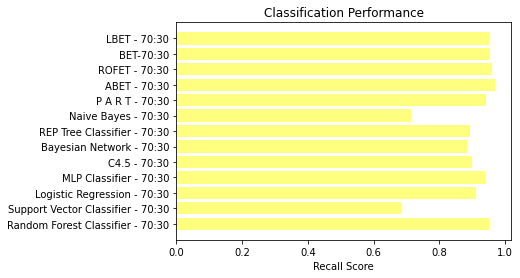

In [95]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall2, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

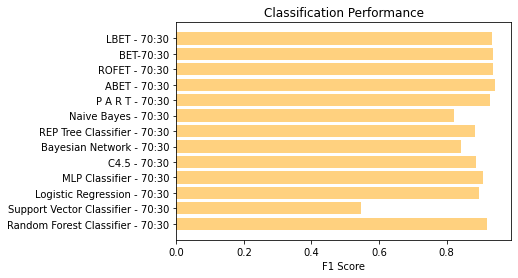

In [96]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score2, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# TPR & FPR

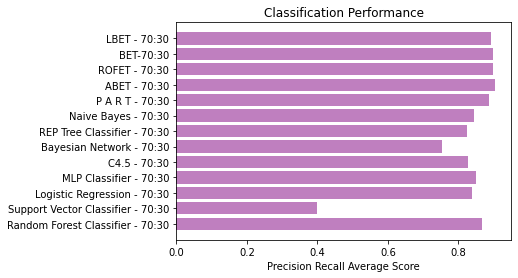

In [98]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prc2, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Recall Average Score')
plt2.title('Classification Performance')
plt2.show()

# ROC Score

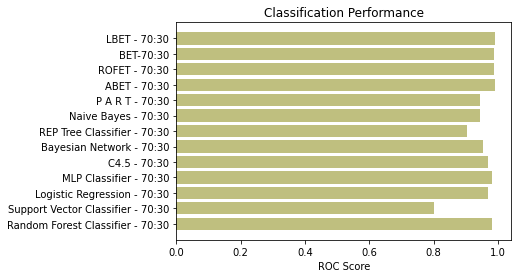

In [99]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auroc2, align='center', alpha=0.5,color='olive')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

# MCC

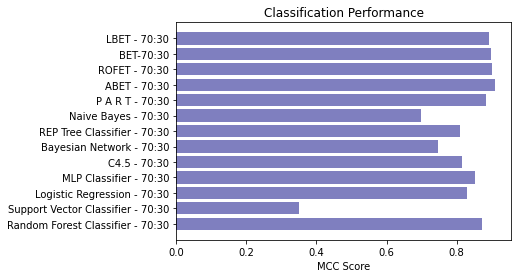

In [100]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mcc2, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

# 60:40

In [101]:
classifier = ML_Model3
y_pos = np.arange(len(classifier))

# Accuracy

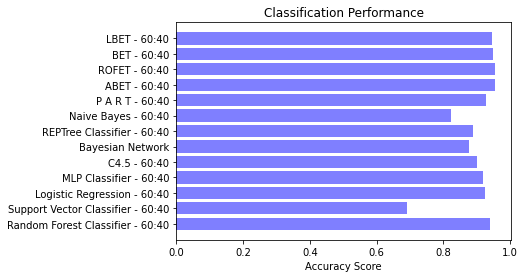

In [102]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy3, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

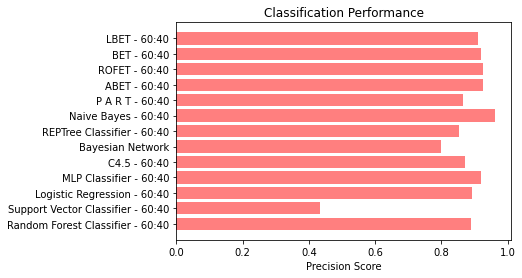

In [103]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision3, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

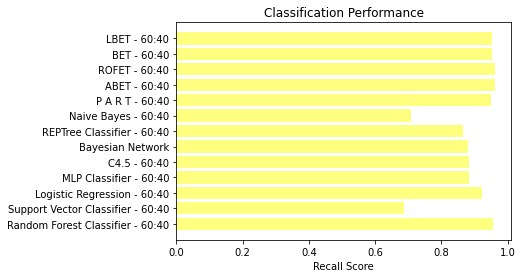

In [104]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall3, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1Score

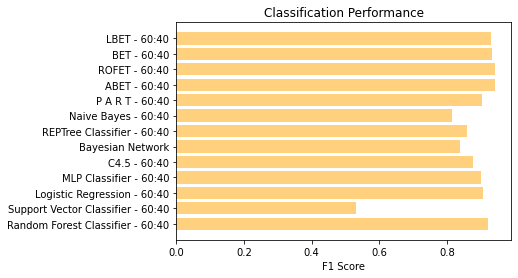

In [105]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score3, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# TPR & FPR

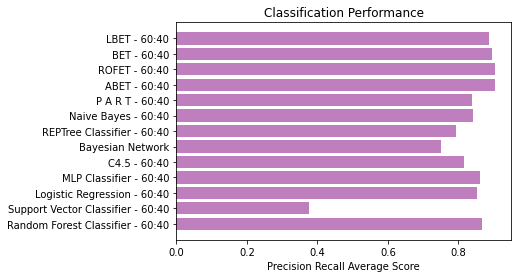

In [106]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prc3, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Recall Average Score')
plt2.title('Classification Performance')
plt2.show()

# ROC Curve

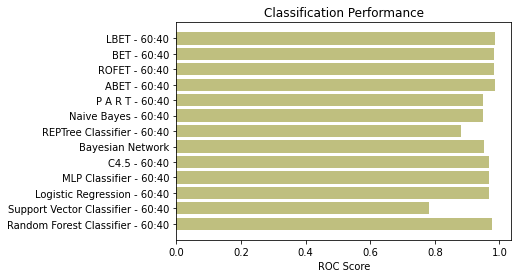

In [107]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auroc3, align='center', alpha=0.5,color='olive')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

# MCC

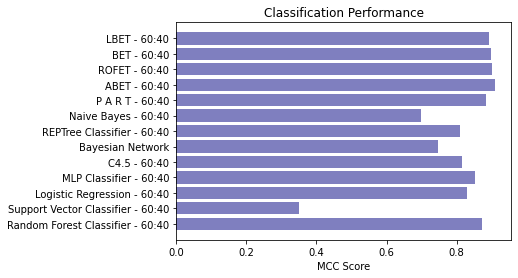

In [108]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mcc2, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()